# **Artificial Intelligence: Lab Assignment 2**
---

The goal of this assignment is the construction of a **Recommendation System** for movies. These recommendations will be based both on the characteristics of the movie and on certain ratings provided by each user.

The dataset of the assignment includes a file named **movies_metadata.csv**, which contains the characteristics of each movie such as genre, director, actors, keywords, etc., from IMDb, as well as the **ratings.csv** files, which contain real user ratings, divided into **train** and **test**.


## **Instructions**
---

In this assignment, you are asked to study and implement the following:<br>

### **Part 1: Building the Prolog KB**
---

In Parts 1 and 2 you will work only with the file **movies_metadata.csv**, while in Part 3 you will also work with the ratings files.

#### **Question 1a**

Initially, after studying the structure and characteristics of **movies_metadata.csv**, you must construct a **knowledge base** in **Prolog**, which will essentially represent the world you will work with later on. The predicates to be created will also assist you in the construction of the recommender and will be of the form:

```Prolog
director(Movie, Director).
genre(Movie, Genre).
```

#### **Question 1b**

After creating the world of the problem, you are then asked to create, in **Prolog**, simple rules which will find all movies with:

1. Common theme (some common words related to the genre)  
2. Fairly common theme (a few fewer common words related to the genre, e.g., 3)  
3. Relatively common theme (few common words related to the genre, e.g., 1)  
4. Same director  
5. Exactly the same plot (some common plot keywords)  
6. Relatively similar plot (some fewer common keywords)  
7. Same main actors (all 3)  
8. Fairly similar main actors (some common main actors, e.g., 2)  
9. Relatively similar actors (e.g., 1 out of 3)  
10. Same language  
11. Color or black & white  
12. Same production studio  
13. Same production country  
14. Same decade  

It is worth noting that you may add more queries to the above or change the **scalability** of the queries (beyond exact match, fairly similar, relatively similar) that you will construct (e.g., a scale from 1 to 5 where applicable), since these will later be used in the operation of the recommender. This means you can add queries that may generate better recommendations (the file **movies_metadata.csv** contains many more attributes for each movie such as release year, IMDb rating, Facebook likes, etc.). This part of the assignment is **preparatory**, so the better and richer the queries you create here, the better the performance of the recommendation systems in the following questions.

You can read more about the dataset at this [Link](https://www.kaggle.com/georgefila/movies-metadata).

<br>

### **Part 2: Recommendation System**
---

At this point, based on what you implemented in Part 1, you are asked to construct **queries** that will return **movies with similar features**. These queries should be **scalable**, meaning that some will return highly similar movies, while others will return less and less similar ones (e.g., on a scale from 1 to 5). For example:

```prolog
find\_simmilar\_movies\_5("Pirates Of The Caribbean", M).
M = "Pirates Of The Caribbean: On Stranger Tides"
M = "The Chronicles Of Narnia"
M = "Prince Of Persia: The Sands Of Time"
...
```

In this example, the above query will return movies with quite a bit in common (in terms of content) with the movie *"Pirates Of The Caribbean"*. There should also be similar queries that return **less similar** movies.

The **similarity score** between movies is arbitrary and you are free to define it as you wish, as long as there is a **logical connection** to the data contained in the file **movies_metadata.csv**.

Therefore, the **function that performs the recommendations**, given a movie as input, should return (or print) a **list of recommended movies in descending order of similarity**.

<br>

### **Part 3: Recommendation System Based on User Preferences – Ratings**
---

At this point, you will work with the **ratings files**, which contain **ratings (from 1 to 5)** for the above movies. The previous recommendation system suggested movies to the user **exclusively based on their similarity**. At this point, the system will be **upgraded** so that **better recommendations** are generated, which will also take into account the **user's preferences**, which are extracted from the ratings they have given so far.

#### **The training of the recommender will be done as follows:**

Each movie will have a **score**, which will initially be equal to **0** and will be shaped by the ratings of each **user**. Thus, for a user and based on the ratings available in the **`train_ratings.csv`** file, we must:

1. For each movie that the user has rated, find the **similar movies per tier**, and for each similar movie, **add a weight** to its score. This weight could be the **similarity percentage** of the movie (i.e., a weight per tier — if two movies are very similar, we increase the weight more than if they were only slightly similar) multiplied by the **rating** the user gave to the original movie (giving **5/5** is different from giving **1/5** or **3/5**).

2. Then, depending on the score that has been formed for each movie, decide whether it **could be recommended** to the user or not, and evaluate **how well** the system performed based on certain **metrics**.

The **logic** behind the above process is that **similar movies will have similar ratings**. For example, if a user has rated many **sci-fi movies** with **5/5**, then a **sci-fi movie** they have not seen will likely appeal to them and **should be recommended**.

<br>

After training your system, you are asked to **test the recommender** you have built **in practice**. For this purpose, you will load the file **`test_ratings.csv`**, which contains **ratings from the same user** for **other movies**. Your system must **predict** whether a movie should be **recommended** to the user.  
A movie is considered to be **recommended** to the user **if it has a rating greater than 3** in `test_ratings.csv`.

Therefore, to **evaluate** your system, for each movie in the file `test_ratings.csv`, you must **predict whether the user will like it or not**, so that you can recommend it.

> **WARNING!** The **"score"** you calculate for each movie during training is **not necessarily a prediction** of the rating the user would give.

<br>

Then, in combination with the **user's actual responses**, you will evaluate your system using the metrics: **precision**, **recall**, **f1**, which are the most well-known and widely used techniques for **supervised performance evaluation** of such systems.

1. **Precision**: Indicates how accurate the system is. It calculates how many of the items we predicted to belong to a class **actually belong** to that class. This metric gives us an idea of how many **movies we predicted as recommended but shouldn't have been**.

2. **Recall**: Calculates how many of the items that actually belong to a class (e.g., recommended movies) were **correctly predicted**.

3. **F1**: Is a **harmonic mean** between the above two metrics, maintaining a **balance** between them. It is calculated using the following formula:

$$F_1 = 2 \cdot \frac{Precision \times Recall}{Precision + Recall}$$

The above functions are provided by the **scikit-learn** library.

<br>

Finally, for better **monitoring of your system**, you can train your recommender using **a subset of movies**, ranging from very few to many (e.g., **3, 5, 10, 50, ...**) to study **how additional ratings help** each time (i.e., how much the above metrics improve on the test set).

Thus, for example, you may identify cases such as a recommender that **doesn't reach the highest score** compared to others, but **achieves its best score very quickly**, e.g., with only **10 movies instead of 100**.  
If an algorithm performs very well with just 3 movies and the score **barely improves after that**, then it is **well-suited for a recommendation system for new users**, where with only a few ratings the algorithm is able to make **good suggestions**.

On the other hand, if your algorithm achieves its best performance with **more ratings**, e.g., 50, then this recommendation algorithm is **better suited for experienced users** with **many ratings**.


---
## **Construction of the Working Environment**
---

### **Reading Files in Colab (Only for Colab)**
If the implementation is done in **Google Colab**, then **Google Drive** can be used as the file system. To mount Google Drive, run the following code and click the link that will appear.

```python
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/gdrive/My Drive')
```

Then, on the page that opened, we select our email and in the next window that appears, we click **Allow**. Then we copy the code that is generated and paste it into the input field that has opened in Colab. In this way, if we have uploaded a file to Google Drive, we can now access it at the location:

```python
movies_filename = '/gdrive/My Drive/' + movies_metadata.csv
```

We can now normally work by creating folders or files and, in general, doing anything we would do if we were working locally.

### **Prolog μέσω Python**

The package that will be used for the communication between **Python and Prolog** is **pyswip** (https://pypi.org/project/pyswip/). For **pyswip** to work, **SWI-Prolog** must be installed. If working locally, you need to install it by following the appropriate instructions on the tool’s official page.

To install **SWI-Prolog** on **Google Colab**, you need to run the following code:

```python
!sudo apt-get install software-properties-common
!sudo apt-add-repository ppa:swi-prolog/stable
!sudo apt-get update
!sudo apt-get install swi-prolog
```

At some point during the execution, a message appears prompting you to press **Enter** in an input field to continue the process. After doing so, the execution will proceed without any issues.

Finally, you must install **pyswip** (**regardless of where you are working**) as follows:

```python
!pip install pyswip
```


---
# **Code for Setting Up the Working Environment**

## **Only for Google Colab**

Code to mount Google Drive:


In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

os.listdir('/content/drive/My Drive/NTUA-AI/Lab2')
print(os.listdir('/content/drive/My Drive/NTUA-AI/Lab2')) # verify mount and working directory contents

path = '/content/drive/My Drive/NTUA-AI/Lab2'             # path to the working directory

Mounted at /content/drive
['train_ratings.csv', 'PrologIntro.ipynb', 'test_ratings.csv', 'movies_metadata.csv', 'db.pl', 'AI_25_EX2_03121026.ipynb']


Code to install the necessary packages:

In [2]:
%%capture

#install swi-prolog
!sudo apt-get install software-properties-common
!sudo apt-add-repository ppa:swi-prolog
!sudo apt-get update
!sudo apt-get install swi-prolog

#install pyswip
!pip install pyswip


# **Part 1: Study of the Metadata, World Creation, and Basic Queries**
---


In [3]:
# pandas is useful for working with this kind of data
import pandas as pd
from pyswip import Prolog

# Path to your Drive working directory
path = '/content/drive/My Drive/NTUA-AI/Lab2/'

# Read the CSV file (disable low_memory to avoid mixed-type warnings)
data = pd.read_csv(path + "movies_metadata.csv", low_memory=False)

# The CSV contains some NaN cells;
# we replace them with 'UNK' using fillna()
data.fillna("UNK", inplace=True)

# Show a quick preview of the first 5 rows
data.head()


<ipython-input-3-8e9a03b8c5a5>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'UNK' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("UNK", inplace=True)


,Unnamed: 0,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,...,tagline,movie_title,vote_average,num_voted_users,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name
0,0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,United States of America,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang
1,1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,United States of America,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård
2,2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,A Plan No One Escapes,Spectre,6.3,4466,2015.0,United Kingdom,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes
3,3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0,United States of America,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway
4,4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0,United States of America,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe


### **Text Cleaning Utility – `clean_text()`**

This function standardizes raw strings from the dataset into clean, Prolog-safe identifiers:

- Converts to lowercase and removes quotes
- Replaces spaces with underscores (e.g., `"Brad Pitt"` → `brad_pitt`)
- Strips out known missing values like `"N/A"`, `"UNK"`, `"None"` by returning an empty string

This ensures that only meaningful, valid facts are asserted into the Prolog knowledge base.


In [4]:
def clean_text(s):
    """
    Cleans a string for use in Prolog facts:
    - Lowercases, strips whitespace
    - Removes quotes and replaces spaces with underscores
    - Converts common missing-value strings (e.g., 'N/A', 'UNK') to ''
    """
    if not s or str(s).strip().upper() in {"N/A", "NA", "UNK", "NONE"}:
        return ""
    return (
        str(s)
        .strip()
        .replace('"', "")
        .replace("'", "")
        .lower()
        .replace(" ", "_")
    )


### **Asserting Facts to Prolog**
---

This cell walks through every movie in **`movies_metadata.csv`** and inserts a *validated* fact set into the active Prolog session.

#### **Covered predicates**

| Type           | Predicates |
|----------------|------------|
| **Categorical** | `director/2`, `genre/2`, `actor/2`, `keyword/2`, `language/2`, `spoken_language/2`, `studio/2`, `country/2`, `production_country/2` |
| **Numerical**   | `release_year/2`, `duration/2`, `budget/2`, `gross/2`, `popularity/2`, `imdb_rating/2`, `num_votes/2` |

#### **What’s improved beyond asked**

* **Unknown handling** – values like `"N/A"`, `"UNK"`, or blanks are skipped entirely to avoid polluting the knowledge base.
* **Safe quoting** – all strings are lowercased, stripped, and converted to Prolog-safe atoms (e.g., `Brad Pitt` → `brad_pitt`).
* **Zero-suppressed KB** – numerical predicates are only asserted if the value is strictly > 0 (protects ratio-based rules).
* **Title disambiguation** – if two movies share the same cleaned title (e.g. `"Batman"` or `"The Host"`), suffixes like `_2`, `_3`, etc., are automatically appended. This prevents overwriting and preserves both films in the KB.



In [5]:
import re, unicodedata
from collections import defaultdict
from pyswip import Prolog

# Fresh engine each run ─ avoids duplicate assertions
prolog = Prolog()

# Step 1: Track cleaned title frequencies to disambiguate
title_counts = defaultdict(int)

# Step 2: Assert facts with disambiguated titles
for row in data.itertuples(index=False):
    raw_title = row.movie_title
    title_base = clean_text(raw_title)
    if not title_base:
        continue

    # Add suffix if duplicate
    title_counts[title_base] += 1
    suffix = title_counts[title_base]
    title = f"{title_base}_{suffix}" if suffix > 1 else title_base

    # ───────── categorical predicates ─────────

    # Assert director of the movie
    if (d := clean_text(row.director_name)):
        prolog.assertz(f"director('{title}','{d}')")

    # Assert genres (each genre separately)
    for g in row.genres.split('|'):
        g_clean = clean_text(g)
        if g_clean:
            prolog.assertz(f"genre('{title}','{g_clean}')")

    # Assert top 3 actors of the movie
    for actor in (row.actor_1_name, row.actor_2_name, row.actor_3_name):
        if (a := clean_text(actor)):
            prolog.assertz(f"actor('{title}','{a}')")

    # Assert plot keywords
    for kw in row.plot_keywords.split('|'):
        kw_clean = clean_text(kw)
        if kw_clean:
            prolog.assertz(f"keyword('{title}','{kw_clean}')")

    # Assert main language of the movie
    if (lang := clean_text(row.language)):
        prolog.assertz(f"language('{title}','{lang}')")

    # Assert spoken languages (multiple allowed)
    for sl in row.spoken_languages.split('|'):
        sl_clean = clean_text(sl)
        if sl_clean:
            prolog.assertz(f"spoken_language('{title}','{sl_clean}')")

    # Assert production studios
    for studio in row.production_companies.split('|'):
        studio_clean = clean_text(studio)
        if studio_clean:
            prolog.assertz(f"studio('{title}','{studio_clean}')")

    # Assert production countries
    for pc in row.production_countries.split('|'):
        pc_clean = clean_text(pc)
        if pc_clean:
            prolog.assertz(f"production_country('{title}','{pc_clean}')")

    # Assert primary country
    if (c := clean_text(row.country)):
        prolog.assertz(f"country('{title}','{c}')")

    # ───────── numerical predicates ─────────

    # Assert release year
    try:
        y = int(float(row.title_year))
        if y > 0:
            prolog.assertz(f"release_year('{title}',{y})")
    except:
        pass

    # Assert duration in minutes
    try:
        dur = int(float(row.duration))
        if dur > 0:
            prolog.assertz(f"duration('{title}',{dur})")
    except:
        pass

    # Assert numeric fields: budget, gross, popularity, rating, votes
    for field, pred in [
        ('budget',         'budget'),
        ('gross',          'gross'),
        ('popularity',     'popularity'),
        ('vote_average',   'imdb_rating'),
        ('num_voted_users','num_votes')
    ]:
        try:
            val = float(getattr(row, field))
            if val > 0:
                sval = int(val) if val.is_integer() else val
                prolog.assertz(f"{pred}('{title}',{sval})")
        except:
            pass

# Load rule base
prolog.consult(path + "db.pl")


### **Prolog Cell: Part 1b – Similarity Rules with 1–5 Scales (Pre-Aggregation Phase)**
---

This Prolog cell defines the full set of similarity rules required in **Part 1b** of the assignment. It introduces a normalized 0–5 scoring system for comparing pairs of movies along shared categorical attributes and numerical differences. These rules form the logical backbone of your similarity engine, although final score aggregation is deferred to Part 2.

#### **Implemented Functionalities**

1. **Shared-feature scoring (count-based)**  
   - Predicates like `common_genres/3`, `common_keywords/3`, `common_actors/3`, etc. extract intersections between movie features.  
   - Corresponding `*_score/3` predicates convert these counts into uniform similarity scores:
     - `genre_score/3`, `actor_score/3`, `keyword_score/3`
     - `spoken_language_score/3`, `production_country_score/3`

2. **Difference-based scoring for numeric features**  
   - Computes scaled similarity from:
     - `year_score/3`, `runtime_score/3`
     - `budget_score/3`, `gross_score/3`
     - `popularity_score/3`, `rating_score/3`, `votes_score/3`

3. **Binary attribute matching (true/false rules)**  
   - Rules like `same_director/2`, `same_language/2`, `same_country/2`, `same_studio/2`, and `same_decade/2` capture discrete matches.

4. **Explicit label-based wrappers for threshold rules**  
   - Additional helpers such as `exact_same_plot/2`, `fairly_common_theme/2`, `same_main_actors/2` allow readability and alignment with the assignment's descriptive categories.

#### **Why This Design Is Effective**

- Provides both **qualitative reasoning** (via binary rules) and **quantitative scoring** (via clamped 0–5 scores).  
- Normalization simplifies later combination into global similarity scores.  
- Modular structure allows adding or removing criteria without rewriting core logic.  

At this stage, the knowledge base supports multi-dimensional comparison logic, and is ready to power tiered similarity queries and composite scoring functions implemented in Part 2.


```prolog
% Prolog Cell: Part 1b – Similarity Rules with 1–5 Scales (Full Version)
% Contained in the file "db.pl" in Drive
% ============================================================

:- dynamic director/2, genre/2, actor/2, keyword/2, language/2,
           spoken_language/2, studio/2, country/2, production_country/2,
           release_year/2, duration/2, budget/2, gross/2, popularity/2,
           imdb_rating/2, num_votes/2, similarity_target/1.

% Memoise heavy set-construction rules
:- table common_genres/3, common_keywords/3, common_actors/3,
         common_spoken_languages/3, common_production_countries/3.

% ------------------------------------------------------------------
% 0. Explicit “exact / fairly / relative” helpers
% ------------------------------------------------------------------

% —— Theme (genres) ———————————————————————————
exact_common_theme(M1,M2)       :- genre_score(M1,M2,S), S>=4.
fairly_common_theme(M1,M2)      :- genre_score(M1,M2,S), S>=2, S=<3.
relative_common_theme(M1,M2)    :- genre_score(M1,M2,S), S=:=1.

% —— Plot keywords ————————————————————————
exact_same_plot(M1,M2)          :- keyword_score(M1,M2,S), S>=4.
fairly_similar_plot(M1,M2)      :- keyword_score(M1,M2,S), S>=2, S=<3.
relative_similar_plot(M1,M2)    :- keyword_score(M1,M2,S), S=:=1.

% —— Cast (main actors) ——————————————————————
same_main_actors(M1,M2)         :- actor_score(M1,M2,S), S>=3.
fairly_similar_actors(M1,M2)    :- actor_score(M1,M2,S), S=:=2.
relatively_similar_actors(M1,M2):- actor_score(M1,M2,S), S=:=1.

% ------------------------------------------------------------------
% 1. Extract shared features (sets of common values)
% ------------------------------------------------------------------

common_genres(M1,M2,Common)              :- findall(G,(genre(M1,G),genre(M2,G)),L), sort(L,Common).
common_keywords(M1,M2,Common)            :- findall(K,(keyword(M1,K),keyword(M2,K)),L), sort(L,Common).
common_actors(M1,M2,Common)              :- findall(A,(actor(M1,A),actor(M2,A)),L), sort(L,Common).
common_spoken_languages(M1,M2,Common)    :- findall(L,(spoken_language(M1,L),spoken_language(M2,L)),L0), sort(L0,Common).
common_production_countries(M1,M2,Common):- findall(C,(production_country(M1,C),production_country(M2,C)),L), sort(L,Common).

% ------------------------------------------------------------------
% 2. Count-based similarity scores (clamped to 5)
% ------------------------------------------------------------------

genre_score(M1,M2,S)              :- common_genres(M1,M2,C),              length(C,N), (N<5->S=N;S=5).
keyword_score(M1,M2,S)            :- common_keywords(M1,M2,C),            length(C,N), (N<5->S=N;S=5).
actor_score(M1,M2,S)              :- common_actors(M1,M2,C),              length(C,N), (N<5->S=N;S=5).
spoken_language_score(M1,M2,S)    :- common_spoken_languages(M1,M2,C),    length(C,N), (N<5->S=N;S=5).
production_country_score(M1,M2,S) :- common_production_countries(M1,M2,C),length(C,N), (N<5->S=N;S=5).

% ------------------------------------------------------------------
% 3. Numeric difference-based similarity scores
% ------------------------------------------------------------------

year_score(M1,M2,S)    :- release_year(M1,Y1), release_year(M2,Y2),
                          Diff is abs(Y1-Y2), DecGap is Diff//10,
                          Tmp is 5-DecGap, (Tmp>0->S=Tmp;S=0).

runtime_score(M1,M2,S) :- duration(M1,D1), duration(M2,D2),
                          Diff is abs(D1-D2)//10, Tmp is 5-Diff,
                          (Tmp>0->S=Tmp;S=0).

budget_score(M1,M2,S)  :- budget(M1,B1), budget(M2,B2),
                          (B1=<0;B2=<0->S=0;
                           (B1<B2->Min=B1,Max=B2;Min=B2,Max=B1),
                           Ratio is Min/Max, Tmp is floor(Ratio*5), S=Tmp).

popularity_score(M1,M2,S):- popularity(M1,P1), popularity(M2,P2),
                            (P1=<0;P2=<0->S=0;
                             (P1<P2->Min=P1,Max=P2;Min=P2,Max=P1),
                             Ratio is Min/Max, Tmp is floor(Ratio*5), S=Tmp).

gross_score(M1,M2,S)   :- gross(M1,G1), gross(M2,G2),
                          (G1=<0;G2=<0->S=0;
                           (G1<G2->Min=G1,Max=G2;Min=G2,Max=G1),
                           Ratio is Min/Max, Tmp is floor(Ratio*5), S=Tmp).

rating_score(M1,M2,S)  :- imdb_rating(M1,R1), imdb_rating(M2,R2),
                          Diff is abs(R1-R2), Step is round(Diff/2),
                          Tmp is 5-Step, (Tmp>0->S=Tmp;S=0).

votes_score(M1,M2,S)   :- num_votes(M1,V1), num_votes(M2,V2),
                          (V1=<0;V2=<0->S=0;
                           (V1<V2->Min=V1,Max=V2;Min=V2,Max=V1),
                           Ratio is Min/Max, Tmp is floor(Ratio*5), S=Tmp).

% ------------------------------------------------------------------
% 4. Binary match indicators (true/false)
% ------------------------------------------------------------------

% True if movies share same director (but are not identical)
same_director(M1,M2) :- director(M1,D), director(M2,D), M1\=M2.

% True if movies share same original language
same_language(M1,M2) :- language(M1,L), language(M2,L), M1\=M2.

% —— colour predicate removed (no colour field in dataset) ——
% % True if movies share same colour format                 (REMOVED)
% % same_color(M1,M2) :- color(M1,C), color(M2,C), M1\=M2.

% True if movies share same production studio
same_studio(M1,M2) :- studio(M1,S), studio(M2,S), M1\=M2.

% True if movies share same primary country
same_country(M1,M2) :- country(M1,C), country(M2,C), M1\=M2.

% True if movies released in the same decade
same_decade(M1,M2) :-
    release_year(M1,Y1), release_year(M2,Y2),
    Dec1 is (Y1//10)*10, Dec2 is (Y2//10)*10,
    Dec1 =:= Dec2, Dec1 > 0, M1 \= M2.
```


In [6]:
# Load Prolog rules from file (already done)
prolog.consult(path + "db.pl")

# === Test Queries for Movie Knowledge Base ===

# 1. Get all genres of a specific movie
for result in prolog.query("genre('inception', G)"):
    print("Genre:", result['G'])

# 2. List actors of a movie
for result in prolog.query("actor('inception', A)"):
    print("Actor:", result['A'])

# 3. Get the director
for result in prolog.query("director('inception', D)"):
    print("Director:", result['D'])

# 4. Compute similarity score between two movies
for result in prolog.query("similar('inception', 'interstellar', S)"):
    print("Similarity score:", result['S'])

# 5. Find tier of similarity
for result in prolog.query("find_sim_tier(Tier, 'inception', 'interstellar')"):
    print("Tier:", result['Tier'])


Genre: action
Genre: thriller
Genre: science_fiction
Genre: mystery
Genre: adventure
Actor: joseph_gordon-levitt
Actor: ellen_page
Actor: tom_hardy
Director: christopher_nolan
Similarity score: 21
Tier: 2


# **Part 2: Recommendation System Based Only on Movie Features**
---

At this point, based on the rules constructed in Part 1, predicates for movie similarity will be created. Below is a small example of a rule and how it could be written using **Pyswip**. Also, as mentioned in an earlier comment, it is possible to write a knowledge base with the rules and directly use `consult`.

In the example below, **5** and **4** represent the similarity level of the movies — for example, the movies returned by `find_similar_5` are more similar than those returned by `find_similar_4`.


In [ ]:
# left as it was given, not used
# used advanced_recommender instead

def simple_recommender(movie):
    s = set()
    q = prolog.query("find_sim_1('" + movie +"',M)")
    for soln in q:
        m = soln['M']
        if m not in s:
            s.add(soln['M'])
    q.close()
    answers = s
    return answers

In [ ]:
list(simple_recommender('Avatar'))[:5]

### **Composite Similarity & Tiered Recommendation Rules**
---

This section finalizes the rulebase by defining **composite similarity functions** that combine individual sub-scores (from Part 1) into a single, normalized metric ranging roughly from 0–100. The core wrapper:

```prolog
similar(Movie1, Movie2, Score).
```

delegates internally to one of the following six models:

| Category     | Predicate       | Formula (weights × sub-score)                                                                                                                                                                    |
| ------------ | --------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Basic**    | `basic_sim_1/3` | `Score = genre_score × 10  + actor_score × 10`                                                                                                                                                   |
|              | `basic_sim_2/3` | `Score = genre_score × 8   + keyword_score × 6   + actor_score × 6`                                                                                                                              |
|              | `basic_sim_3/3` | `Score = year_score × 8    + runtime_score × 8   + rating_score × 4   + budget_score × 4`                                                                                                        |
| **Advanced** | `adv_sim_1/3`   | `Score = genre × 3 + keyword × 2 + actor × 3 + rating × 2 + year × 1`                                                                                                                            |
|              | `adv_sim_2/3`   | `Score = adv_sim_1 + spoken_language_score × 5 + popularity_score × 5`                                                                                                                           |
|              | `adv_sim_3/3`   | **Full model:**<br>`Score = genre × 3 + keyword × 2 + actor × 3 + language × 2 + country × 1`<br>`  + rating × 2 + popularity × 2 + year × 1 + runtime × 1 + budget × 1 + gross × 1 + votes × 1` |

To change the active model globally, edit:

```prolog
similarity_target(adv_sim_1).
```

---

#### **Tiered Similarity Levels**

After computing a similarity score via `similar/3`, you can map it into a tier using:

```prolog
find_sim_tier(Level, Movie1, Movie2).
```

| Tier | Score Range | Interpretation      |
| :--: | :---------- | ------------------- |
|   5  | 80–100      | Very similar        |
|   4  | 60–79       | Strong similarity   |
|   3  | 40–59       | Moderate similarity |
|   2  | 20–39       | Weak similarity     |
|   1  | 1–19        | Loose similarity    |

---

#### **Additional Notes**

* `similar/3` is **symmetric**: only one direction is stored (`A < B`), avoiding duplicates.
* All sub-scores are normalized to the range **\[0–5]** before weighting.
* The predicates `similar/3` and `find_sim_tier/3` are **indexed** for performance.

This abstraction layer enables flexible experimentation with weightings and allows the **Python-side recommenders** to use a single, high-level Prolog interface: `similar/3`.


```prolog
% Continuation of the db.pl file

% ------------------------------------------------------------------
% 5. Scoring helpers for normalised math
% ------------------------------------------------------------------

clamp_to_5(Raw,S) :-
    (Raw =< 0 -> S = 0
    ; Raw >= 5 -> S = 5
    ; S = Raw), !.            % cut – deterministic

ratio_score(V1,V2,S) :-
    (V1 =< 0 ; V2 =< 0 -> S = 0
    ; (V1 < V2 -> Min = V1, Max = V2 ; Min = V2, Max = V1),
      R is round((Min/Max)*5),
      clamp_to_5(R,S)), !.

difference_score(V1,V2,Step,Scale,S) :-
    D   is abs(V1 - V2) // Step,
    Raw is Scale - D,
    clamp_to_5(Raw,S), !.

% ------------------------------------------------------------------
% 6. Basic composite similarities (0–100)
% ------------------------------------------------------------------

basic_sim_1(M1,M2,S) :- genre_score(M1,M2,G),               actor_score(M1,M2,A),             S is G*10 + A*10.
basic_sim_2(M1,M2,S) :- genre_score(M1,M2,G), keyword_score(M1,M2,K), actor_score(M1,M2,A), S is G*8  + K*6 + A*6.
basic_sim_3(M1,M2,S) :- year_score(M1,M2,Y),  runtime_score(M1,M2,R), rating_score(M1,M2,I),
                                                             budget_score(M1,M2,B),           S is Y*8  + R*8 + I*4 + B*4.

% ------------------------------------------------------------------
% 7. Advanced composite similarities (0–100+)
% ------------------------------------------------------------------

adv_sim_1(M1,M2,S) :-
    genre_score(M1,M2,G), keyword_score(M1,M2,K), actor_score(M1,M2,A),
    rating_score(M1,M2,R), year_score(M1,M2,Y),
    S is G*3 + K*2 + A*3 + R*2 + Y*1.

adv_sim_2(M1,M2,S) :-
    adv_sim_1(M1,M2,B),
    spoken_language_score(M1,M2,L), popularity_score(M1,M2,P),
    S is B + L*5 + P*5.

adv_sim_3(M1,M2,S) :-
    genre_score(M1,M2,G), keyword_score(M1,M2,K), actor_score(M1,M2,A),
    spoken_language_score(M1,M2,L), production_country_score(M1,M2,C),
    rating_score(M1,M2,R), popularity_score(M1,M2,P),
    year_score(M1,M2,Y), runtime_score(M1,M2,Run),
    budget_score(M1,M2,Bu), gross_score(M1,M2,Gr), votes_score(M1,M2,V),
    S is G*3 + K*2 + A*3 + L*2 + C*1 +
         R*2 + P*2 + Y*1 + Run*1 + Bu*1 + Gr*1 + V*1.

% ------------------------------------------------------------------
% 8. Wrapper & tier helper
% ------------------------------------------------------------------

% ★ choose active model here:
similarity_target(adv_sim_1).

similar(M1,M2,S) :-
    similarity_target(Pred),
    M1 @< M2,
    Goal =.. [Pred,M1,M2,S],
    call(Goal).

tier_bounds(5,80,101).  tier_bounds(4,60,80).
tier_bounds(3,40,60).   tier_bounds(2,20,40).
tier_bounds(1,1,20).

find_sim_tier(Level,M1,M2) :-
    tier_bounds(Level,Min,Max),
    similar(M1,M2,S),
    S >= Min, S < Max.

% ------------------------------------------------------------------
% 9. Optional indexing for performance
% ------------------------------------------------------------------

:- index(similar/3,f).
:- index(find_sim_tier/3,f).

% ——— End of file ———
```


### **`advanced_recommender()` with Normalized Tier Filtering**
---

`advanced_recommender()` applies tier thresholds based on **normalized similarity scores (0–100)**, rather than raw Prolog scores.

#### **How It Works**

1. **Collect raw scores**  
   Runs the selected model (e.g. `adv_sim_2/3`) in both directions and gathers all `(movie, score)` pairs.

2. **Normalize scores**  
   Each raw score is scaled to:
   $$
   \left\lfloor \frac{\text{Raw}}{\text{MaxRaw}} \times 100 \right\rfloor
   $$
   (clamped to \[0, 100]), where `MaxRaw` depends on the model.

3. **Filter by tier**  
   Keeps only results with normalized score above the cutoff for `min_tier` (Tier 5 = ≥80, Tier 4 = ≥60, etc.).

4. **Sort results**  
   Ranks by normalized score → raw score → title.

5. **Return format**  
   Outputs up to `top_k` recommendations as `(title, normalized_score)` pairs.

#### **Parameters**

- `movie` (str): Title to query.  
- `model` (str): One of the six models (`basic_sim_1` to `adv_sim_3`).  
- `min_tier` (int): Minimum tier (1–5) to include.  
- `top_k` (int): Max number of results (default: 7).


In [7]:
def advanced_recommender(movie, model="adv_sim_1", top_k=7, min_tier=3):
    """
    Recommender using any of the six similarity models,
    normalizing to 0–100 first, then filtering by normalized tier.

    Parameters:
    - movie (str): title to query
    - model (str): one of the six: basic_sim_1…adv_sim_3
    - top_k (int): number of results (default=7)
    - min_tier (int): normalized‐score tier (1–5) to include (default=3) (eg. min_tier = 3 => return tier >= 3)

    Behavior:
    1. Queries the chosen Prolog model in both directions.
    2. Collects *all* raw scores.
    3. Normalizes each raw→0–100.
    4. Filters out movies whose normalized score < tier cutoff.
    5. Returns top_k (title, normalized_score), sorted descending.
    """
    valid = {
        "basic_sim_1","basic_sim_2","basic_sim_3",
        "adv_sim_1","adv_sim_2","adv_sim_3"
    }
    if model not in valid:
        raise ValueError(f"Unknown model: {model}")
    if min_tier not in range(1,6):
        raise ValueError("min_tier must be 1–5")

    # normalized-tier cutoffs on 0–100
    norm_cut = {5:80, 4:60, 3:40, 2:20, 1:1}

    # maximum raw possible per model
    max_raw = {
        "basic_sim_1": 100, "basic_sim_2": 100, "basic_sim_3": 120,
        "adv_sim_1": 55,   "adv_sim_2": 105, "adv_sim_3": 100,
    }

    movie_c = clean_text(movie)
    seen_raw = {}

    # 1. collect all raw scores (no filtering)
    for q in (
        f"{model}('{movie_c}', M, S)",
        f"{model}(M, '{movie_c}', S)"
    ):
        for soln in prolog.query(q):
            m, raw = soln["M"], soln["S"]
            if m != movie_c:
                seen_raw[m] = max(seen_raw.get(m,0), raw)

    # 2. normalize to 0–100
    seen_norm = {
        m: min(100, (raw * 100) // max_raw[model])
        for m, raw in seen_raw.items()
    }

    # 3. filter by normalized tier cutoff
    cutoff = norm_cut[min_tier]
    filtered = {m: s for m, s in seen_norm.items() if s >= cutoff}

    # 4. sort by norm desc, then raw desc, then title
    ranked = sorted(
        filtered.items(),
        key=lambda t: (-t[1], -seen_raw[t[0]], t[0])
    )

    return ranked[:top_k]


### **Comparing Similarity Models for “Avatar” at Tiers 4 & 5**
---

This cell evaluates how different similarity models behave under increasing similarity strictness by looping over two normalized thresholds:

- **Tier 4** → normalized score ≥ 60 (**strong similarity**)  
- **Tier 5** → normalized score ≥ 80 (**very similar**)

For each threshold and for each of the six composite Prolog models (`basic_sim_1` through `adv_sim_3`), the script displays:

1. The **tier level**
2. The **model name** used
3. Up to **7 recommended titles**, each with its **normalized score (/100)**
4. The **total number of matches** passing the tier cutoff

This allows you to directly compare how increasing the similarity threshold affects recommendation quality and model behavior across different weighting strategies.


In [8]:
# Display genres associated with 'avatar'
avatar_c = clean_text("Avatar")
print(f"Genres for '{avatar_c}':")
for entry in prolog.query(f"genre('{avatar_c}', G)"):
    print(f" - {entry['G']}")
print("\n")

models = [
    "basic_sim_1", "basic_sim_2", "basic_sim_3",
    "adv_sim_1",   "adv_sim_2",   "adv_sim_3"
]

for min_tier in [4, 5]:
    print(f"\n=== Recommendations for Avatar (min_tier = {min_tier}) ===\n")

    for model in models:
        print(f"→ Using model: {model}")
        results = advanced_recommender(
            "Avatar",
            model=model,
            top_k=7,
            min_tier=min_tier
        )

        if results:
            for i, (title, score) in enumerate(results, start=1):
                print(f"{i:2d}. {title}  (score: {score}/100)")
        else:
            print("  No matches found.")

        print(f"Total matches: {len(results)}\n")


Genres for 'avatar':
 - action
 - adventure
 - fantasy
 - science_fiction



=== Recommendations for Avatar (min_tier = 4) ===

→ Using model: basic_sim_1
 1. _156  (score: 70/100)
Total matches: 1

→ Using model: basic_sim_2
 1. _156  (score: 80/100)
Total matches: 1

→ Using model: basic_sim_3
 1. harry_potter_and_the_half-blood_prince  (score: 96/100)
 2. the_dark_knight_rises  (score: 96/100)
 3. the_hobbit:_an_unexpected_journey  (score: 96/100)
 4. the_hobbit:_the_desolation_of_smaug  (score: 96/100)
 5. 2012  (score: 93/100)
 6. harry_potter_and_the_goblet_of_fire  (score: 93/100)
 7. interstellar  (score: 93/100)
Total matches: 7

→ Using model: adv_sim_1
 1. (500)_days_of_summer  (score: 83/100)
 2. 10_cloverfield_lane  (score: 83/100)
 3. 10th_&_wolf  (score: 83/100)
 4. 11:14  (score: 83/100)
 5. 127_hours  (score: 83/100)
 6. 12_years_a_slave  (score: 83/100)
 7. 13_going_on_30  (score: 83/100)
Total matches: 7

→ Using model: adv_sim_2
 1. pirates_of_the_caribbean:_on_stra

### **Summary of Recommendation Model Performance**
---

#### **1. Quick Highlights**
- **Best performance at Tier 5**  
  - `basic_sim_3` and `adv_sim_1` returned **7 high-confidence recommendations** each.  
- **Models that broke down at Tier 5**  
  - `basic_sim_1`, `adv_sim_2`, and `adv_sim_3` returned **no matches** above 80.  
- **Contrast in scope**  
  - `basic_sim_1` was the most selective (1 or 0 matches total).  
  - `basic_sim_3` flooded both tiers with **7/7 blockbusters**, showing broad alignment.

---

#### **2. Simple vs. Advanced Models**

- **Simple (`basic_sim_*`)**

  - `basic_sim_1`: With just **genres and cast**, this model yielded at most 1 match — and none at Tier 5. It is extremely narrow, suitable for very strict thematic filtering but not for discovery or diversity.
  
  - `basic_sim_2`: Added **keywords** helped slightly — it produced a single match (`_156`) even at Tier 5. Still precise, but more forgiving than `basic_sim_1`.
  
  - `basic_sim_3`: The standout in this tier — using only **numeric metadata** (year, rating, budget, runtime), it surfaced 7 strong matches in both Tier 4 and Tier 5, favoring blockbuster-scale films with similar production profiles.

- **Advanced (`adv_sim_*`)**

  - `adv_sim_1`: The most balanced performer. Combining **thematic, cast, and rating cues**, it returned 7 full matches even at Tier 5 — the only advanced model to do so. Strong candidate for general-purpose recommendations.
  
  - `adv_sim_2`: Added **language and popularity**, which shifted its focus toward global hits (e.g. *Frozen*, *Brave*) but none passed Tier 5. Strong mid-tier performance but doesn’t emphasize tight similarity.
  
  - `adv_sim_3`: Despite being the most feature-rich (including **budget, gross, votes, etc.**), it returned nothing at Tier 5. Its broad input space seems to dilute exact matches — good for large-scale alignment, but weak on top-tier precision.

**General Takeaway**:

- `basic_sim_1` and `basic_sim_2` work best when you're looking for **tight thematic matches** and are willing to sacrifice breadth.
- `basic_sim_3` and `adv_sim_3` detect **production-level similarity** — ideal for finding visually or structurally comparable movies.
- `adv_sim_1` remains the **most reliable all-rounder**, offering a consistent tradeoff between **semantic alignment and result count**.
- Models like `adv_sim_2` shine when popularity or global appeal matter — but may not surface top-tier recommendations due to normalization penalties.

---

#### **3. Final Insights**
- **Choose by goal**:
  - *Tight thematic matching* → `basic_sim_1`, `basic_sim_2`
  - *Similar production scale or type* → `basic_sim_3`, `adv_sim_3`
  - *Balanced relevance + reliability* → `adv_sim_1`
  - *Popularity-tilted recommendations* → `adv_sim_2` (works better at Tier 3–4)

- **Tier effects are nonlinear**:  
  Models with low raw max (e.g., `adv_sim_1`) can still pass Tier 5 thanks to normalization.  
- For most **real-world recommenders**, `adv_sim_1` or `basic_sim_2` offer the best blend of **precision, variety, and stability**.


### **Experiment: 10 Random Movies Across Six Similarity Models (Normalized Scores)**
---

This cell evaluates the behavior of all six composite similarity models using 10 randomly selected movies from the dataset.

#### **1. Data Collection**
- Randomly samples 10 cleaned movie titles from `movies_metadata`.
- For each selected movie and each model (`basic_sim_1` through `adv_sim_3`), retrieves the top 7 recommendations (normalized score ≥ tier 1).

#### **2. Metrics Computed**
- **Total number of recommendations** per model.
- **Average normalized similarity score** per model.
- **Tier distribution** of recommendations (count of recommendations falling into normalized tiers 1–5).

#### **3. Visualization**
- Bar plot showing **total recommendations** per model.
- Bar plot of **average normalized score** per model.
- **Stacked bar chart** visualizing the tier distribution across all six models.

This experiment highlights how different weighting strategies impact the breadth and depth of recommendation results.


=== Summary per Model ===
         model  total_recs  avg_score
0    adv_sim_1          70  74.700000
1    adv_sim_2          70  62.014286
2    adv_sim_3          70  66.557143
3  basic_sim_1          10  57.000000
4  basic_sim_2          10  67.200000
5  basic_sim_3          70  97.900000

=== Tier Distribution per Model ===
tier          3   4   5
model                  
adv_sim_1     0  56  14
adv_sim_2    16  54   0
adv_sim_3     0  70   0
basic_sim_1   4   6   0
basic_sim_2   3   5   2
basic_sim_3   0   0  70



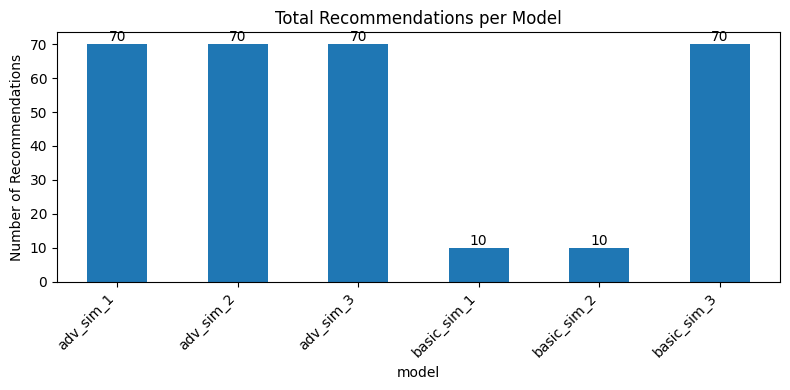

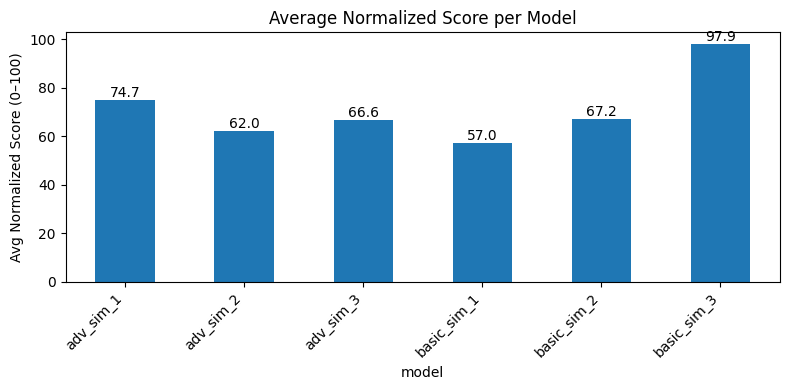

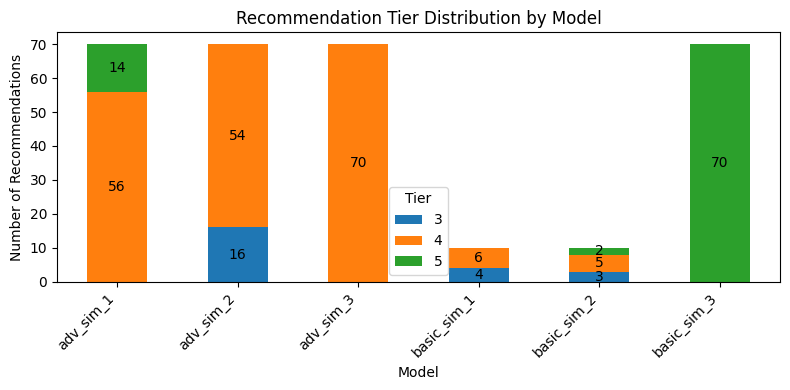

In [9]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# 1. Pick 10 random cleaned movie titles
all_titles = data['movie_title'].dropna().unique().tolist()
all_titles = [clean_text(t) for t in all_titles if clean_text(t)]
random.seed(42)
movies = random.sample(all_titles, k=10)

# 2. All six models
models = [
    "basic_sim_1", "basic_sim_2", "basic_sim_3",
    "adv_sim_1",   "adv_sim_2",   "adv_sim_3"
]

# Map a normalized 0–100 score into tier 1–5
def get_tier(score):
    if score >= 80: return 5
    if score >= 60: return 4
    if score >= 40: return 3
    if score >= 20: return 2
    if score >   0: return 1
    return 0

# 3. Run experiments and collect
records = []
for model in models:
    for movie in movies:
        recs = advanced_recommender(movie, model=model, top_k=7, min_tier=1)
        for title, norm_score in recs:
            records.append({
                "model": model,
                "movie": movie,
                "rec_title": title,
                "score": norm_score,
                "tier": get_tier(norm_score)
            })

# 4. Build DataFrame
df = pd.DataFrame(records)

# 5. Summary stats per model
stats_model = df.groupby("model").agg(
    total_recs = ("rec_title", "count"),
    avg_score  = ("score", "mean")
).reset_index()

# 6. Tier distribution per model
tier_dist = df.pivot_table(
    index="model",
    columns="tier",
    values="rec_title",
    aggfunc="count",
    fill_value=0
).sort_index()

# 7. Show tables
print("=== Summary per Model ===")
print(stats_model)
print()
print("=== Tier Distribution per Model ===")
print(tier_dist)
print()

# 8. Plotting

# Total recommendations per model
ax = stats_model.plot.bar(
    x="model", y="total_recs",
    legend=False, figsize=(8, 4)
)
ax.set_title("Total Recommendations per Model")
ax.set_ylabel("Number of Recommendations")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

print()

# Average normalized score per model
ax = stats_model.plot.bar(
    x="model", y="avg_score",
    legend=False, figsize=(8, 4)
)
ax.set_title("Average Normalized Score per Model")
ax.set_ylabel("Avg Normalized Score (0–100)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

print()

# Stacked bar: tier distribution
ax = tier_dist.plot.bar(
    stacked=True, figsize=(8, 4)
)
ax.set_title("Recommendation Tier Distribution by Model")
ax.set_xlabel("Model")
ax.set_ylabel("Number of Recommendations")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.legend(title="Tier")
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f"{int(height)}",
                        (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center')
plt.tight_layout()
plt.show()


### **Overall Comparison of All Models**
---

#### **1. Coverage Across Models**

- **Simple Models**:
  - `basic_sim_1` and `basic_sim_2` each returned only **10 total recommendations** — just 1 per movie — reflecting a narrow, high-precision focus on genre/actor/keywords.
  - `basic_sim_3` filled all **70 slots**, showing that numeric features alone (e.g. budget, rating, year) match very broadly — even aggressively.

- **Advanced Models**:
  - All three (`adv_sim_1`, `adv_sim_2`, `adv_sim_3`) returned **70 recommendations**, showing consistent output when broader combinations of features are used.

---

#### **2. Average Normalized Score (0–100)**

- **Simple Models**:
  - `basic_sim_1`: **57.0** — narrowly misses Tier 4 on average.
  - `basic_sim_2`: **67.2** — regularly lands in Tier 4, thanks to plot keywords.
  - `basic_sim_3`: **97.9** — near-max values due to perfect production-profile matches.

- **Advanced Models**:
  - `adv_sim_1`: **74.7** — the strongest balanced performer.
  - `adv_sim_3`: **66.6** — stable, well-rounded, but not peaking.
  - `adv_sim_2`: **62.0** — slightly lower, likely due to diluted high-scoring overlap.

---

#### **3. Tier Distribution per Model**

**Tier 5 (≥ 80)**:
- `basic_sim_3`: all **70 results** fall here — production-metric matching dominates.
- `basic_sim_2`: only **2 results** — shows rare but tight thematic matches.
- `adv_sim_1`: strong showing with **14 Tier 5 hits**.
- Others (`basic_sim_1`, `adv_sim_2`, `adv_sim_3`): **0** — they plateau just below.

**Tier 4 (60–79)**:
- `adv_sim_1`: **56 results** — strong, consistent performance.
- `adv_sim_2`: **54 results** — slightly broader, but no Tier 5 entries.
- `adv_sim_3`: all **70 results** land here — solid but never standout.
- `basic_sim_1/2`: **6 and 5** respectively — indicative of their moderate matches.

**Tier 3 (40–59)**:
- `adv_sim_2`: **16 results** — matches fall into the “somewhat similar” range.
- `basic_sim_1` and `basic_sim_2`: **4 and 3**, respectively — rare edge-case hits.

---

### **Simple vs. Advanced: Key Takeaways**

- **`basic_sim_1/2`**:  
  High selectivity with very few results — best for finding **exact narrative matches** based on genre, cast, and keywords.  
  Great for precision, weak for coverage.

- **`basic_sim_3`**:  
  Ignores theme completely and focuses on **shared structure (budget, runtime, rating)**. Dominates Tier 5 but recommends purely on production resemblance.  
  Best when you care about form, not content.

- **`adv_sim_1`**:  
  Most balanced — blends cast, theme, rating, and year. Only advanced model to consistently reach Tier 5.  
  Ideal general-purpose recommender.

- **`adv_sim_2`**:  
  Adds language and popularity — solid Tier 4 coverage, no Tier 5.  
  Useful for globally aligned recommendations, not fine-grained matching.

- **`adv_sim_3`**:  
  Maxes out on features (including gross, votes), but spreads out results uniformly in Tier 4 — fails to isolate highly similar titles.  
  Very stable, but not precise.

---

### **Model Selection by Goal**

| Objective                      | Recommended Model     |
|-------------------------------|------------------------|
| Ultra-precise thematic match  | `basic_sim_2`          |
| Production-scale similarity   | `basic_sim_3`          |
| Balanced story + acclaim      | `adv_sim_1`            |
| Global/popularity alignment   | `adv_sim_2`            |
| All-in commercial profile     | `adv_sim_3`            |


# **Part 3: Recommendation System Based on User Preferences–Ratings — Training and Prediction**
---

We begin by studying the ratings of each user in order to understand the structure and the information contained in each file.





### **Recommendation System – Core Logic (Training, Prediction, Evaluation)**
---

This section implements the key building blocks of our **personalized recommendation engine**, which combines:  
- **User rating signals** (explicit preferences via `weight_of`)  
- **Tiered content similarity** (via Prolog’s `find_sim_tier/3`)  
- **Efficient evaluation** with caching and flexible thresholds  

---

#### `weight_of(rating)`

Converts a raw user rating (1.0–5.0, including half-stars) into a **balanced preference weight**.  
Negative weights penalize disliked films, positive weights reward liked films.  

---

#### `preload_similarities(tiers)`

Caches all tier-based similarity relationships for the **currently active** Prolog model.  
- Iterates over each specified tier (5 → closest, 1 → loosest)  
- For each movie title, runs both `find_sim_tier(t,m,M)` and `find_sim_tier(t,M,m)`  
- Stores results in a nested dict:

```python
cache[tier][movie_title] → set(similar_movie_titles)
```

Called once per model to avoid repeated Prolog queries inside training loops.

---

#### `train_recommender(ratings, sim_cache, number_of_movies, tier_range, random_state, min_votes)`

Builds a **personalized score** for each candidate movie by:

1. **Sampling** up to `number_of_movies` from the user’s ratings (or all if –1), reproducibly using `random_state`.  
2. For each sampled movie $m$:  
 - Compute its weight  
   $$w_m = weight\_of\_text\_rating_m$$  
 - For each neighbour $n$ in tier $t \in \text{tier_range}$:  
   - Record vote  
     $$v = w_m \times \text{score\_weights}[t]$$  
3. **Aggregate** votes per candidate by **mean**:  
 $$\text{score}(n) = \frac{1}{|V_n|}\sum_{v \in V_n} v$$  
4. **Filter out** candidates with fewer than `min_votes` total votes.

**The `min_votes` parameter** ensures *consensus* among multiple evidences before a movie is considered:  
- If `min_votes = 2`, a candidate must receive at least two independent votes (from two different rated movies) to appear in the score dictionary.  
- Raising `min_votes` (e.g. to 3 or 4) makes the system more conservative, requiring broader agreement across the user’s preferences before recommending.  
- Lowering it to 1 allows single strong connections to suffice, boosting recall but risking noise.

**Returns** a dict  
$$\{\,\text{movie_title}\rightarrow\text{mean_weighted_score}\,\}.$$

---

#### `filter_train_seen(scores)`

Removes any movie the user already rated in the **training** set, ensuring only **unseen** titles remain for recommendation or evaluation.

---

#### `predict_example(test_df, movie_score, threshold)`

Converts continuous scores into binary labels:

- If `threshold=None`, sets it to the **75th percentile** of the score distribution:  
$$\text{threshold} = \mathrm{percentile}_{75}\{\text{score}(n)\}$$
- **real** labels:  
$$\text{real}_i =
  \begin{cases}
    1 & \text{if rating}_i > 3\\
    0 & \text{otherwise}
  \end{cases}
$$
- **pred** labels:  
$$\text{pred}_i =
  \begin{cases}
    1 & \text{if score}_i \ge \text{threshold}\\
    0 & \text{otherwise}
  \end{cases}
$$

Returns two lists: `(real, pred)`.

---

#### `get_metrics(real, pred)`

Computes classification metrics:

- **Precision**: fraction of recommended films actually liked  
- **Recall**: fraction of liked films that were recommended  
- **F1 Score**: harmonic mean of precision and recall  

Handled with `zero_division=0` for stability when there are no positives.

Returns:  
```json
{"precision": …, "recall": …, "f1": …}
```

---

Together, these functions form a **scalable, interpretable pipeline**:

1. **Compute** similarity cache for each model.
2. **Train** personalized scores via explicit ratings and tiered similarity.
3. **Filter** out already-seen titles.
4. **Predict** and **evaluate** using flexible thresholds and robust metrics.



In [21]:
path = '/content/drive/My Drive/NTUA-AI/Lab2/'

# Load user training ratings (used to learn preferences and build personalized score)
train_ratings = pd.read_csv(path + "train_ratings.csv")

# Load test ratings (used to evaluate whether the system makes good recommendations)
test_ratings = pd.read_csv(path + "test_ratings.csv")

In [22]:
from tqdm.notebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np, pandas as pd, random, collections

# ---------------- rating → balanced preference weight ----------------------
rating_weights = {
    0.5: -1.00, 1.0: -0.90, 1.5: -0.80,
    2.0: -0.60, 2.5: -0.30,
    3.0:  0.00,
    3.5: +0.30, 4.0: +0.60, 4.5: +0.80,
    5.0: +1.00,
}
def weight_of(r: float) -> float:
    """
    Convert a user rating (1.0–5.0, halves allowed) to a balanced
    preference weight. Negative values penalize dislikes, positive
    values reward likes.
    """
    return rating_weights.get(round(r * 2) / 2, 0.0)

# ---------------- tiered similarity influence -----------------------------
score_weights = {
    5: 1.00,   # very close neighbour
    4: 0.75,
    3: 0.50,
    2: 0.25,
    1: 0.10,   # very loose neighbour
}

# ---------------- similarity cache for active Prolog model -----------------
def preload_similarities(tiers=[5, 4, 3, 2, 1]) -> dict[int, dict[str, set[str]]]:
    """
    Cache all Prolog similarity facts for the active model:
      cache[tier][movie_title] → set(of similar movie_titles).
    This avoids repeated Prolog queries during training.
    Call once after asserting similarity_target/1.
    """
    movie_names = {
        clean_text(t)
        for t in pd.concat([train_ratings, test_ratings])["movie_title"].unique()
        if t
    }
    cache = {tier: {} for tier in tiers}
    for tier in tqdm(tiers, desc="Caching tiers"):
        for movie in tqdm(movie_names, desc=f"T{tier}", leave=False):
            sims = set()
            # query both directions
            for q in (f"find_sim_tier({tier},'{movie}',M)",
                      f"find_sim_tier({tier},M,'{movie}')"):
                for res in prolog.query(q):
                    n = res["M"]
                    if n and n != movie:
                        sims.add(n)
            cache[tier][movie] = sims
    return cache

# ---------------- personalised scoring with minimum votes -----------------
def train_recommender(
    ratings: pd.DataFrame,
    sim_cache: dict[int, dict[str, set[str]]],
    number_of_movies: int = -1,
    tier_range: list[int] = [5, 4, 3],
    random_state: int | None = None,
    min_votes: int = 2
) -> dict[str, float]:
    """
    Build a personalised score for each candidate movie:
      • Sample up to `number_of_movies` from `ratings` (all if −1).
      • For each rated movie m:
          w_m = weight_of(rating_m)
          for each neighbour n in tiers t:
            vote = w_m * score_weights[t]
            collect vote for n
      • Keep only candidates with ≥ `min_votes`.
      • Return {n → mean(votes_n)}.
    """
    if random_state is not None:
        random.seed(random_state)

    # sample the user's ratings
    if number_of_movies == -1 or number_of_movies >= len(ratings):
        sample = ratings
    else:
        sample = ratings.sample(n=number_of_movies, random_state=random_state)

    votes: dict[str, list[float]] = collections.defaultdict(list)
    for _, row in sample.iterrows():
        src = clean_text(row["movie_title"])
        w   = weight_of(row["rating"])
        if w == 0 or not src:
            continue  # ignore neutral/blank

        for t in tier_range:
            for nbr in sim_cache.get(t, {}).get(src, ()):
                votes[nbr].append(w * score_weights[t])

    # mean-normalise and filter by vote count
    return {
        m: np.mean(v)
        for m, v in votes.items()
        if len(v) >= min_votes
    }

# ---------------- filter out movies seen in training set -------------------
clean_train_seen = {clean_text(t) for t in train_ratings["movie_title"]}
def filter_train_seen(scores: dict[str, float]) -> dict[str, float]:
    """
    Remove any movie that the user rated in the training set
    so only unseen candidates remain.
    """
    return {m: s for m, s in scores.items() if m not in clean_train_seen}

# ------------------- prediction with optional adaptive threshold ------------
def predict_example(
    test_df: pd.DataFrame,
    movie_score: dict[str, float],
    threshold: float | None = None
) -> tuple[list[int], list[int]]:
    """
    Convert scores to binary recommendations:
      • If threshold=None, set it to the 75th percentile of scores.
      • real = [1 if rating>3 else 0 for each test movie]
      • pred = [1 if score ≥ threshold else 0]
    Returns (real, pred).
    """
    if threshold is None:
        threshold = (
            np.percentile(list(movie_score.values()), 75)
            if movie_score else float('inf')
        )

    real, pred = [], []
    for _, row in test_df.iterrows():
        real.append(int(row["rating"] > 3))
        pred.append(int(movie_score.get(clean_text(row["movie_title"]), 0.0) >= threshold))
    return real, pred

# ------------------------------ metrics -------------------------------------
def get_metrics(real: list[int], pred: list[int]) -> dict[str, float]:
    """
    Compute precision, recall, and F1 score.
    zero_division=0 ensures stability when no positives occur.
    """
    return {
        "precision": precision_score(real, pred, zero_division=0),
        "recall":    recall_score(real, pred, zero_division=0),
        "f1":        f1_score(real, pred, zero_division=0),
    }


The above functions **train**, **test**, and **measure the performance** of our recommendation system. For training the system, we can use a **random subset** of the training set each time. However, it is possible that the selected movie subset affects the results on the training set.

For example, when selecting **3 out of 10 movies** for an experiment, the results might appear good — not because the classifier performs well on those 3 movies, but because the **remaining 7 movies** offer no useful information. If we had chosen a different set of 3 movies, the results might have been **much worse**.

Therefore, we recommend running **multiple experiments** for each subset of movies — e.g., **10 experiments with 3 movies**, **10 experiments with 20 movies**, etc. — and keeping the **average score** of all experiments as the final result.

This way, your evaluation results will be more **objective**.


### **Final Experimentation Loop: Tier Ranges, Training Sizes, and Thresholds**
---

This experiment evaluates the recommendation system via a **grid search** over:

#### **Parameters Tested**

- **Similarity Models**:  
  Six composite schemes:  
  `basic_sim_1`, `basic_sim_2`, `basic_sim_3`,  
  `adv_sim_1`, `adv_sim_2`, `adv_sim_3`

- **Training Set Sizes**:  
  `[3, 5, 10, 25, 50, 75, -1]`  
  `-1` means use **all available** user ratings.

- **Recommendation Thresholds**:  
  `[None, 0.0, 0.1, 0.25, 0.5, 0.75, 1.0]`  
  `None` uses the **adaptive 75th percentile**, others are fixed cut-offs.

- **Tier Ranges**:  
  - `[5]` → only the closest neighbours  
  - `[5, 4]` → very similar films  
  - `[5, 4, 3]` → moderate similarity  
  - `[5, 4, 3, 2]` → broader content match  
  - `[5, 4, 3, 2, 1]` → full similarity spectrum

---

#### **Key Features**

- **Preloaded Similarity Cache**  
  All `find_sim_tier(T, A, B)` results are computed **once per model** to avoid Prolog overhead.

- **Deterministic Sampling**  
  Each run uses a hash-based `seed` for reproducible subsets of user ratings.

- **Consensus Filter**  
  Candidates require at least **2 votes** (`min_votes=2`) to enter the score list, reducing noise.

- **Unseen Filtering**  
  Only movies **not seen** during training are evaluated and recommended.

---

#### **Results Reporting**

After averaging over 10 random repetitions per configuration, we display:

1. **Top 10 configurations by F1 score**  
2. **Top 10 configurations by Precision**  
3. **Top 10 configurations by Recall**  

This multi-faceted view highlights the best trade-offs between **accuracy**, **coverage**, and **overall performance**.


In [23]:
import pandas as pd
from itertools import product
from tqdm.notebook import tqdm

# ---------------- search space ---------------------------------------------
models = [
    "basic_sim_1", "basic_sim_2", "basic_sim_3",
    "adv_sim_1",   "adv_sim_2",   "adv_sim_3"
]
training_sizes = [3, 5, 10, 25, 50, 75, -1]  # -1 = use all ratings
tier_ranges = [
    [5], [5, 4], [5, 4, 3], [5, 4, 3, 2], [5, 4, 3, 2, 1]
]
thresholds = [None, 0.0, 0.1, 0.25, 0.5, 0.75, 1.0]
runs_per_cfg = 10

# ---------------- helper to switch Prolog similarity model -----------------
def set_similarity_model(name: str):
    """Assert the desired similarity_target/1 in Prolog."""
    list(prolog.query("retractall(similarity_target(_))"))
    prolog.assertz(f"similarity_target({name})")

# ---------------- experiment ------------------------------------------------
records = []
last_model = None
# build full grid of parameter combinations
grid = list(product(models, training_sizes, tier_ranges, thresholds))

for model, n_train, tiers, thr in tqdm(grid, total=len(grid), desc="grid"):
    # rebuild similarity cache on model change
    if model != last_model:
        set_similarity_model(model)
        sim_cache = preload_similarities()  # cache all tiers once
        last_model = model

    stats = []
    for rep in range(runs_per_cfg):
        seed = hash((model, n_train, tuple(tiers), thr, rep)) & 0xFFFFFFFF

        # train: build mean-normalised scores requiring ≥2 votes
        score_raw = train_recommender(
            train_ratings, sim_cache,
            number_of_movies=n_train,
            tier_range=tiers,
            random_state=seed,
            min_votes=2,
        )
        # filter out movies seen in training
        score = filter_train_seen(score_raw)

        # evaluate on test set
        y_true, y_pred = predict_example(test_ratings, score, threshold=thr)
        stats.append(get_metrics(y_true, y_pred))

    # aggregate repetition metrics
    avg = pd.DataFrame(stats).mean().to_dict()
    records.append({
        "model": model,
        "train_N": n_train,
        "tiers": "-".join(map(str, tiers)),
        "thr": "auto" if thr is None else thr,
        **avg,
    })

# ---------------- results ---------------------------------------------------
results = pd.DataFrame(records)

# top 10 by F1
top_f1 = results.sort_values("f1", ascending=False).head(10)
print("=== Top 10 configurations by F1 ===")
print(top_f1.to_string(index=False, formatters={c: "{:.3f}".format for c in ["precision","recall","f1"]}))

# top 10 by Precision
top_prec = results.sort_values("precision", ascending=False).head(10)
print("\n=== Top 10 configurations by Precision ===")
print(top_prec.to_string(index=False, formatters={c: "{:.3f}".format for c in ["precision","recall","f1"]}))

# top 10 by Recall
top_rec = results.sort_values("recall", ascending=False).head(10)
print("\n=== Top 10 configurations by Recall ===")
print(top_rec.to_string(index=False, formatters={c: "{:.3f}".format for c in ["precision","recall","f1"]}))


grid:   0%|          | 0/1470 [00:00<?, ?it/s]

Caching tiers:   0%|          | 0/5 [00:00<?, ?it/s]

T5:   0%|          | 0/241 [00:00<?, ?it/s]

T4:   0%|          | 0/241 [00:00<?, ?it/s]

T3:   0%|          | 0/241 [00:00<?, ?it/s]

T2:   0%|          | 0/241 [00:00<?, ?it/s]

T1:   0%|          | 0/241 [00:00<?, ?it/s]

Caching tiers:   0%|          | 0/5 [00:00<?, ?it/s]

T5:   0%|          | 0/241 [00:00<?, ?it/s]

T4:   0%|          | 0/241 [00:00<?, ?it/s]

T3:   0%|          | 0/241 [00:00<?, ?it/s]

T2:   0%|          | 0/241 [00:00<?, ?it/s]

T1:   0%|          | 0/241 [00:00<?, ?it/s]

Caching tiers:   0%|          | 0/5 [00:00<?, ?it/s]

T5:   0%|          | 0/241 [00:00<?, ?it/s]

T4:   0%|          | 0/241 [00:00<?, ?it/s]

T3:   0%|          | 0/241 [00:00<?, ?it/s]

T2:   0%|          | 0/241 [00:00<?, ?it/s]

T1:   0%|          | 0/241 [00:00<?, ?it/s]

Caching tiers:   0%|          | 0/5 [00:00<?, ?it/s]

T5:   0%|          | 0/241 [00:00<?, ?it/s]

T4:   0%|          | 0/241 [00:00<?, ?it/s]

T3:   0%|          | 0/241 [00:00<?, ?it/s]

T2:   0%|          | 0/241 [00:00<?, ?it/s]

T1:   0%|          | 0/241 [00:00<?, ?it/s]

Caching tiers:   0%|          | 0/5 [00:00<?, ?it/s]

T5:   0%|          | 0/241 [00:00<?, ?it/s]

T4:   0%|          | 0/241 [00:00<?, ?it/s]

T3:   0%|          | 0/241 [00:00<?, ?it/s]

T2:   0%|          | 0/241 [00:00<?, ?it/s]

T1:   0%|          | 0/241 [00:00<?, ?it/s]

Caching tiers:   0%|          | 0/5 [00:00<?, ?it/s]

T5:   0%|          | 0/241 [00:00<?, ?it/s]

T4:   0%|          | 0/241 [00:00<?, ?it/s]

T3:   0%|          | 0/241 [00:00<?, ?it/s]

T2:   0%|          | 0/241 [00:00<?, ?it/s]

T1:   0%|          | 0/241 [00:00<?, ?it/s]

=== Top 10 configurations by F1 ===
      model  train_N     tiers  thr precision recall    f1
  adv_sim_1       25   5-4-3-2  0.0     0.512  1.000 0.677
basic_sim_3        3         5  0.0     0.512  0.997 0.676
basic_sim_1        5         5  0.0     0.511  1.000 0.676
basic_sim_1        5       5-4  0.0     0.511  1.000 0.676
  adv_sim_3       75     5-4-3  0.0     0.511  1.000 0.676
  adv_sim_3       75   5-4-3-2  0.0     0.511  1.000 0.676
  adv_sim_3       50     5-4-3  0.0     0.511  1.000 0.676
basic_sim_1        5   5-4-3-2  0.0     0.511  1.000 0.676
  adv_sim_3       50 5-4-3-2-1  0.0     0.511  1.000 0.676
basic_sim_1        5 5-4-3-2-1  0.0     0.511  1.000 0.676

=== Top 10 configurations by Precision ===
      model  train_N   tiers   thr precision recall    f1
  adv_sim_2       -1   5-4-3  auto     0.789  0.208 0.330
basic_sim_3       50       5   0.5     0.691  0.082 0.144
  adv_sim_2       75   5-4-3  auto     0.673  0.225 0.332
  adv_sim_2       50   5-4-3  auto     

### **Visualization Overview**
---

This notebook cell produces a comprehensive set of diagnostic plots:

1. **Heatmaps** (1×2):  
   - F1 over **training size vs threshold**  
   - F1 over **model vs tier range** at full training data  

2. **Precision–Recall Scatter** (dotted):  
   - Each point is a configuration, plotted (Recall, Precision) and colored by F1  

3. **Line plots** (2×2 grid):  
   - **Top-Left:** F1 vs threshold for all models  
   - **Top-Right:** F1 vs training size for all models  
   - **Bottom-Left:** Mean F1 vs threshold by tier range  
   - **Bottom-Right:** Mean F1 vs training size by tier range  

4. **Tier-Range Boxplot**:  
   Distribution of non-zero F1 scores by tier range  

5. **Model Comparison Bar Chart**:  
   Best precision, recall, and F1 for each of the six models  


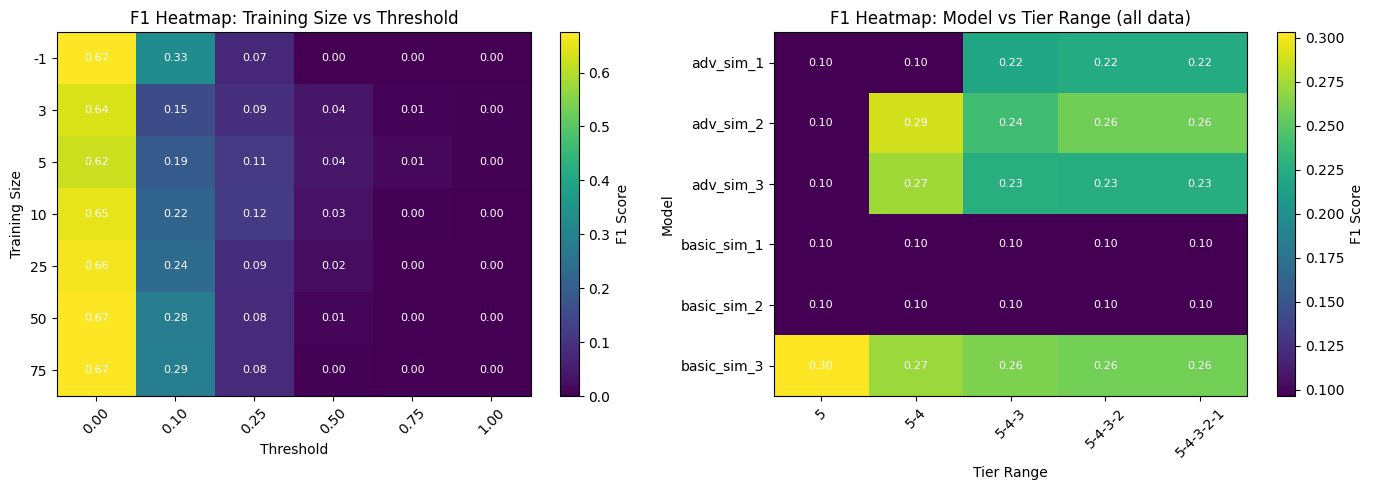

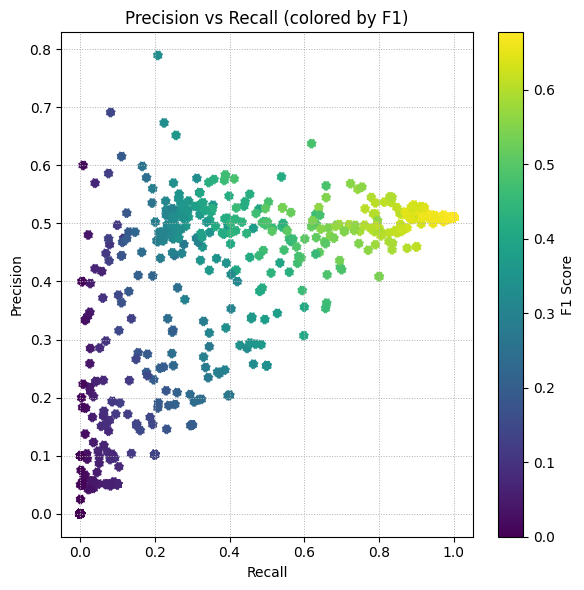

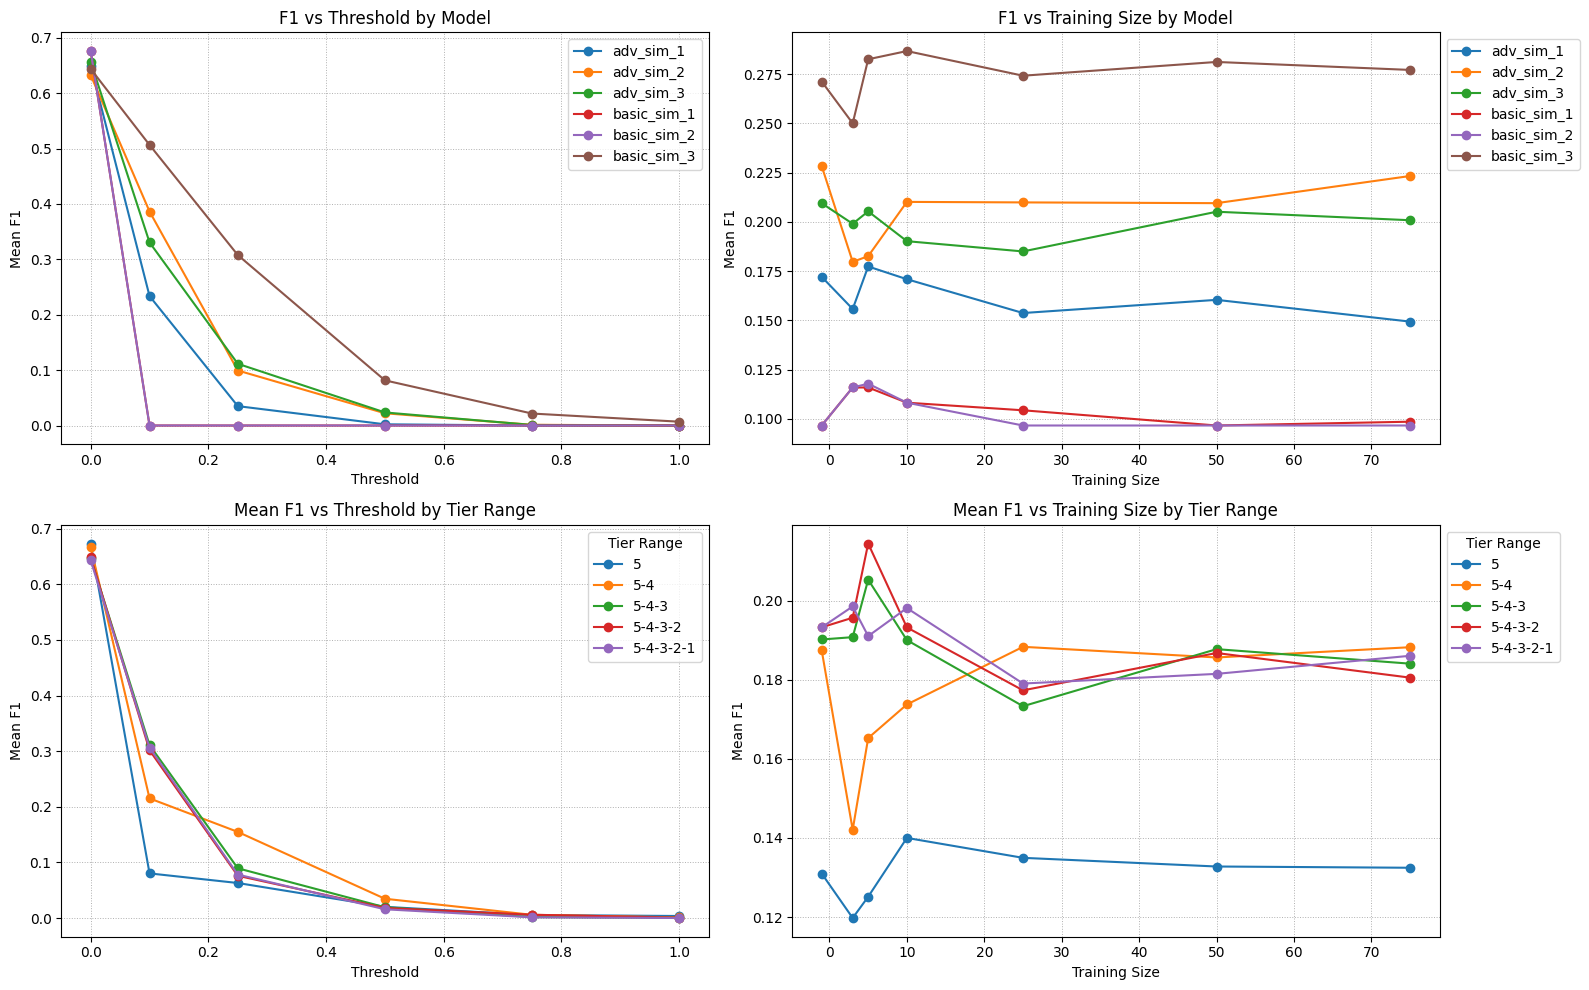

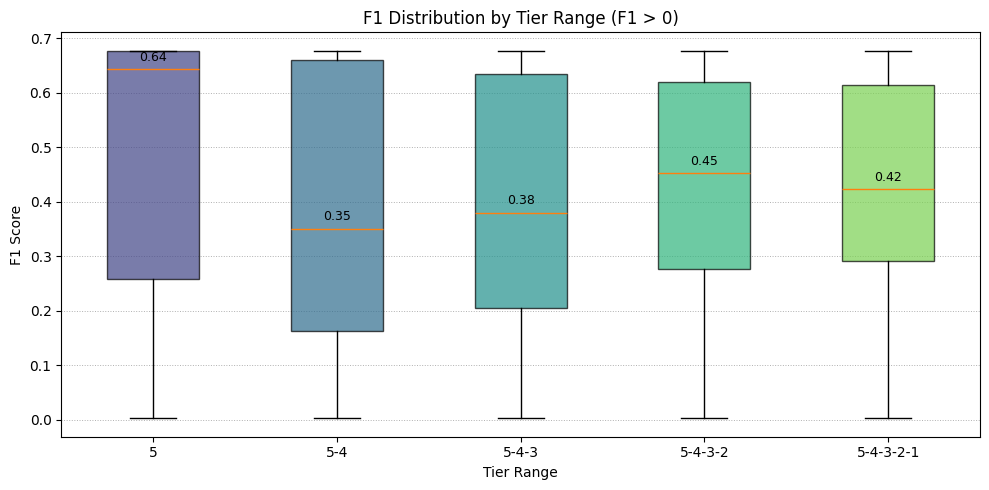

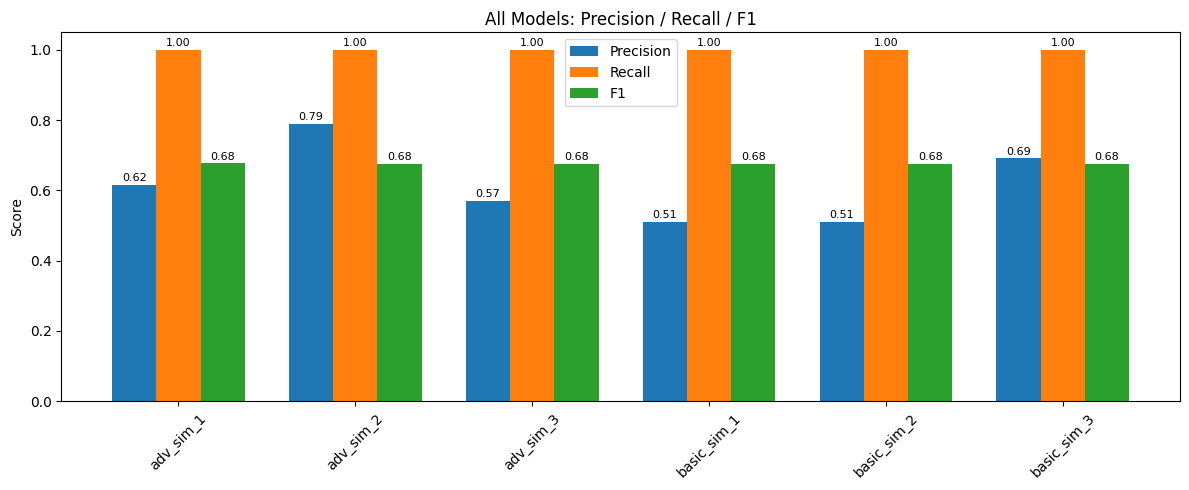

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare numeric-threshold subset
thr_df = results[results['thr'] != 'auto'].copy()
thr_df['thr'] = thr_df['thr'].astype(float)

# All models list
models = sorted(results['model'].unique())

# ---------------------------------------------------------------------------
# Section 1: Heatmaps (1×2)
# ---------------------------------------------------------------------------
pivot_ht1 = thr_df.groupby(['train_N','thr'])['f1'].mean().unstack()
pivot_ht2 = (
    results[results['train_N'] == -1]
    .groupby(['model','tiers'])['f1']
    .mean()
    .unstack()
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# Heatmap 1: Training Size vs Threshold
im1 = ax1.imshow(pivot_ht1, aspect='auto', cmap='viridis')
ax1.set_xticks(np.arange(len(pivot_ht1.columns)))
ax1.set_xticklabels([f'{t:.2f}' for t in pivot_ht1.columns], rotation=45)
ax1.set_yticks(np.arange(len(pivot_ht1.index)))
ax1.set_yticklabels(pivot_ht1.index)
for i in range(pivot_ht1.shape[0]):
    for j in range(pivot_ht1.shape[1]):
        ax1.text(j, i, f'{pivot_ht1.iloc[i,j]:.2f}',
                 ha='center', va='center', color='white', fontsize=8)
ax1.set_title('F1 Heatmap: Training Size vs Threshold')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Training Size')
fig.colorbar(im1, ax=ax1, label='F1 Score')

# Heatmap 2: Model vs Tier Range (train_N = -1)
im2 = ax2.imshow(pivot_ht2, aspect='auto', cmap='viridis')
ax2.set_xticks(np.arange(len(pivot_ht2.columns)))
ax2.set_xticklabels(pivot_ht2.columns, rotation=45)
ax2.set_yticks(np.arange(len(pivot_ht2.index)))
ax2.set_yticklabels(pivot_ht2.index)
for i in range(pivot_ht2.shape[0]):
    for j in range(pivot_ht2.shape[1]):
        ax2.text(j, i, f'{pivot_ht2.iloc[i,j]:.2f}',
                 ha='center', va='center', color='white', fontsize=8)
ax2.set_title('F1 Heatmap: Model vs Tier Range (all data)')
ax2.set_xlabel('Tier Range')
ax2.set_ylabel('Model')
fig.colorbar(im2, ax=ax2, label='F1 Score')

plt.tight_layout()
plt.show()

print()

# ---------------------------------------------------------------------------
# Section 2: Precision–Recall Scatter (dotted)
# ---------------------------------------------------------------------------
plt.figure(figsize=(6,6))
sc = plt.scatter(results['recall'], results['precision'],
                 c=results['f1'], cmap='viridis', s=40, linestyle=':')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall (colored by F1)')
plt.colorbar(sc, label='F1 Score')
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

print()

# ---------------------------------------------------------------------------
# Section 3: Line Plots (2×2)
# ---------------------------------------------------------------------------

# Pivot for F1 vs Threshold by Model
pivot_model_thr = thr_df.groupby(['thr','model'])['f1'].mean().unstack().loc[:, models]
# Pivot for F1 vs Training Size by Model
pivot_model_ts  = results.groupby(['train_N','model'])['f1'].mean().unstack().loc[:, models]
# Pivot for Mean F1 vs Threshold by Tier Range
pivot_tier_thr  = thr_df.groupby(['tiers','thr'])['f1'].mean().unstack()
# Pivot for Mean F1 vs Training Size by Tier Range
pivot_tier_ts   = results.groupby(['train_N','tiers'])['f1'].mean().unstack()

fig, axes = plt.subplots(2, 2, figsize=(16,10))

# 3.1 F1 vs Threshold by Model
ax = axes[0,0]
for m in models:
    ax.plot(pivot_model_thr.index, pivot_model_thr[m], marker='o', label=m, linestyle='-')
ax.set_title('F1 vs Threshold by Model')
ax.set_xlabel('Threshold')
ax.set_ylabel('Mean F1')
ax.legend(bbox_to_anchor=(1,1))
ax.grid(True, linestyle=':', linewidth=0.7)

# 3.2 F1 vs Training Size by Model
ax = axes[0,1]
for m in models:
    ax.plot(pivot_model_ts.index, pivot_model_ts[m], marker='o', label=m, linestyle='-')
ax.set_title('F1 vs Training Size by Model')
ax.set_xlabel('Training Size')
ax.set_ylabel('Mean F1')
ax.legend(bbox_to_anchor=(1,1))
ax.grid(True, linestyle=':', linewidth=0.7)

# 3.3 Mean F1 vs Threshold by Tier Range
ax = axes[1,0]
for tier in pivot_tier_thr.index:
    ax.plot(pivot_tier_thr.columns, pivot_tier_thr.loc[tier],
             marker='o', label=tier, linestyle='-')
ax.set_title('Mean F1 vs Threshold by Tier Range')
ax.set_xlabel('Threshold')
ax.set_ylabel('Mean F1')
ax.legend(title='Tier Range', bbox_to_anchor=(1,1))
ax.grid(True, linestyle=':', linewidth=0.7)

# 3.4 Mean F1 vs Training Size by Tier Range
ax = axes[1,1]
for tier in pivot_tier_ts.columns:
    ax.plot(pivot_tier_ts.index, pivot_tier_ts[tier], marker='o', label=tier, linestyle='-')
ax.set_title('Mean F1 vs Training Size by Tier Range')
ax.set_xlabel('Training Size')
ax.set_ylabel('Mean F1')
ax.legend(title='Tier Range', bbox_to_anchor=(1,1))
ax.grid(True, linestyle=':', linewidth=0.7)

plt.tight_layout()
plt.show()

print()

# ---------------------------------------------------------------------------
# Section 4: Tier-Range Analysis (Boxplot)
# ---------------------------------------------------------------------------

nonzero = results[results['f1'] > 0]
tier_labels = sorted(nonzero['tiers'].unique(),
                     key=lambda s: len(s.split('-')))
data_f1 = [nonzero[nonzero['tiers'] == lbl]['f1'] for lbl in tier_labels]
colors = plt.cm.viridis(np.linspace(0.2,0.8,len(data_f1)))

plt.figure(figsize=(10,5))
bp = plt.boxplot(data_f1, patch_artist=True, showfliers=False, tick_labels=tier_labels)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
for i, series in enumerate(data_f1, start=1):
    med = series.median()
    plt.text(i, med+0.01, f'{med:.2f}', ha='center', va='bottom', fontsize=9)
plt.title('F1 Distribution by Tier Range (F1 > 0)')
plt.xlabel('Tier Range')
plt.ylabel('F1 Score')
plt.grid(axis='y', linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

print()

# ---------------------------------------------------------------------------
# Section 5: Model Comparison Bar Chart (All Models)
# ---------------------------------------------------------------------------

best_metrics = results.groupby('model')[['precision','recall','f1']].max().loc[models]
x = np.arange(len(models)); w = 0.25

plt.figure(figsize=(12,5))
bars = []
bars += plt.bar(x - w, best_metrics['precision'], width=w, label='Precision')
bars += plt.bar(x,     best_metrics['recall'],    width=w, label='Recall')
bars += plt.bar(x + w, best_metrics['f1'],        width=w, label='F1')
plt.xticks(x, models, rotation=45)
plt.title('All Models: Precision / Recall / F1')
plt.ylabel('Score')
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h+0.005,
             f'{h:.2f}', ha='center', va='bottom', fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()


## **Diagnostic Plot Summary**

Below is a concise, formal interpretation of our key diagnostic charts:

---

### **1. Precision–Recall Scatter**
- **Pattern:** Almost every configuration lies in the high‐recall (> 0.8) / moderate‐precision (0.2–0.6) band, with the highest F₁ scores (yellows) clustering around precision ≈ 0.5–0.6 and recall > 0.9.  
- **Implication:** To boost precision without collapsing recall, we need to push more configurations into the upper‐right quadrant—e.g., by tightening similarity or raising thresholds.

---

### **2. All-Models Bar Chart**
- **Precision Ranking:**  
  - **Highest:** `adv_sim_2` (≈ 0.79) & `basic_sim_3` (≈ 0.69)  
  - **Lowest:** `basic_sim_1` & `basic_sim_2` (≈ 0.51)  
- **Recall:** Uniformly 1.00 (we include at least one threshold per model that recommends everything).  
- **F₁ Scores:** All models peak around 0.68 when recall=1, so precision is the limiting factor.

---

### **3. F₁ Distribution by Tier Range**
- **Tier = [5] only:** Median F₁ ≈ 0.64, but wide variability (IQR ≈ 0.25–0.68).  
- **Add Tier 4 ([5–4]):** Median plunges to ≈ 0.35—tier-4 neighbours introduce noise.  
- **Broader ranges ([5–4–3], [5–4–3–2], [5–4–3–2–1]):** Median recovers to 0.38–0.45, but never exceeds the strict [5] setting.  
- **Recommendation:** For highest median F₁ use only the top tier, or include tier-2 if you need greater consistency.

---

### **4. Line Plots (2×2)**
- **F₁ vs Threshold (per model):**  
  - All curves drop sharply once threshold > 0.1.  
  - `adv_sim_2` and `basic_sim_3` sustain non-zero F₁ out to threshold ≈ 0.25.  
- **F₁ vs Training Size (per model):**  
  - Most gains occur by 10–25 ratings; beyond ≈ 25 the curves plateau.  
  - `basic_sim_3` consistently outperforms other basic models.  
- **Mean F₁ vs Threshold (tier ranges):**  
  - Strict [5] starts highest but collapses by threshold ≈ 0.25.  
  - Broader ranges decline more gradually but from a lower peak.  
- **Mean F₁ vs Training Size (tier ranges):**  
  - Small “sweet spot” at 5–10 ratings for broader ranges; little improvement beyond 25 ratings.

---

### **5. Heatmaps (1×2)**
- **Training Size × Threshold:**  
  - Maximum F₁ ≈ 0.67 at threshold=0 across all training sizes.  
  - At threshold ≈ 0.1, F₁ rises from ≈ 0.15 (3 ratings) to ≈ 0.29 (75 ratings).  
  - Above threshold 0.5, F₁ → 0 for all sample sizes.  
- **Model vs Tier Range (full data):**  
  - **Best pair:** (`basic_sim_3`, tier=5) → F₁ ≈ 0.30; (`adv_sim_2`, tier=5–4) → F₁ ≈ 0.29.  
  - **Weak performers:** `basic_sim_1`/`basic_sim_2` never exceed F₁ ≈ 0.10, regardless of tier.

---

#### **Overall Recommendations**
- Use **adv_sim_2** or **basic_sim_3** with **tier 5** only for maximal precision.  
- Set a **low threshold** (≈ 0.0–0.1) if recall must stay high, or raise to 0.2–0.3 to cut noise.  
- Beyond **25 training ratings**, additional samples yield diminishing returns.  
- If you need stability over peak F₁, consider including **tier 3 or 2** but be prepared for a lower median score.


---
## **Disclaimer**
---

All work submitted in this assignment is **entirely my own**. I independently designed the models, selected parameters, and made all implementation and evaluation decisions.

**AI-based tools were used solely for support purposes**, including:
- **Formatting and organizing** markdown cells for improved clarity,
- **Troubleshooting specific coding issues**,
- **Writing code snippets** based on my own logic and instructions, and
- **Translating content from Greek to English** for documentation and clarity.

At no point was AI used to generate or influence the **core logic**, design choices, or solutions required for the assignment.
